# Machine Learning / Linear Regression + Metrikler

Amaç:
- Regression (sayısal tahmin)
- Train/Test
- Baseline (model yokken performans)
- Linear Regression modeli
- Metrikler: MAE, RMSE, R2
- Grafikler: Actual vs Predicted + Residual (Hata) grafikleri

Veri:
- `insurance.csv`


## Kurulum


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option("display.max_columns", 80)
pd.set_option("display.width", 140)
sns.set_theme()

print("Hazır!")


Hazır!


## 1) Veri yükle


In [ ]:
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,22,female,31.2,3,no,southeast,9831.04
1,43,female,19.5,3,no,southeast,8936.44
2,21,female,29.1,3,yes,northwest,27432.20
3,37,female,24.4,0,yes,northeast,20906.03
4,41,male,23.3,4,no,southeast,9502.91


## 2) Problem: `charges` tahmini (Regression)


Hedef (y): **charges** (sayısal maliyet)  
Özellikler (X): age, sex, bmi, children, smoker, region


In [ ]:
X = df.drop(columns=["charges"])
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (640, 6) Test: (160, 6)


## 3) Baseline (Model yok!): Herkese ortalama `charges` tahmin et


Bu baseline şu soruya cevap verir:
'Model kurmasam bile ne kadar hata yaparım?'


In [ ]:
baseline_value = y_train.mean()
pred_base = np.full(shape=len(y_test), fill_value=baseline_value)

mae_b = mean_absolute_error(y_test, pred_base)
rmse_b = np.sqrt(mean_squared_error(y_test, pred_base))
r2_b = r2_score(y_test, pred_base)

print("Baseline mean charges:", round(baseline_value, 2))
print("BASELINE MAE :", round(mae_b, 2))
print("BASELINE RMSE:", round(rmse_b, 2))
print("BASELINE R2  :", round(r2_b, 3))


Baseline mean charges: 12088.96
BASELINE MAE : 5138.74
BASELINE RMSE: 6388.74
BASELINE R2  : -0.001


## 4) Pipeline + Linear Regression


In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Kategorik / sayisal kolonlari ayir
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train.select_dtypes(exclude=["object"]).columns.tolist()

# 2) Preprocess + model pipeline
prep = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", "passthrough", num_cols),
])

pipe = Pipeline([
    ("prep", prep),
    ("model", LinearRegression())
])

# 3) Egit ve tahmin et
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

# 4) Metrikler
mae = mean_absolute_error(y_test, pred)

mse = mean_squared_error(y_test, pred)   # squared parametresi yok
rmse = np.sqrt(mse)

r2 = r2_score(y_test, pred)

print("MODEL MAE :", round(mae, 2))
print("MODEL RMSE:", round(rmse, 2))
print("MODEL R2  :", round(r2, 3))


MODEL MAE : 1893.25
MODEL RMSE: 2266.53
MODEL R2  : 0.874


## 5) Grafik 1: Actual vs Predicted


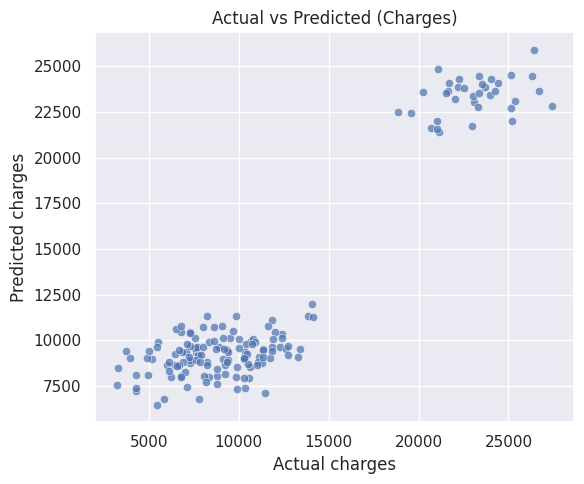

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=pred, alpha=0.7)
plt.title("Actual vs Predicted (Charges)")
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.tight_layout()
plt.show()


## 6) Residual (Hata) grafiği


Residual = **gerçek - tahmin**


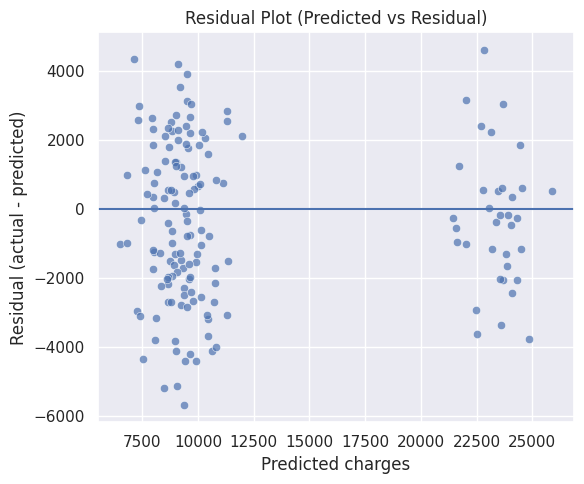

In [ ]:
residual = y_test.values - pred

plt.figure(figsize=(6,5))
sns.scatterplot(x=pred, y=residual, alpha=0.7)
plt.axhline(0)
plt.title("Residual Plot (Predicted vs Residual)")
plt.xlabel("Predicted charges")
plt.ylabel("Residual (actual - predicted)")
plt.tight_layout()
plt.show()


## 7) Residual dağılımı (Histogram)


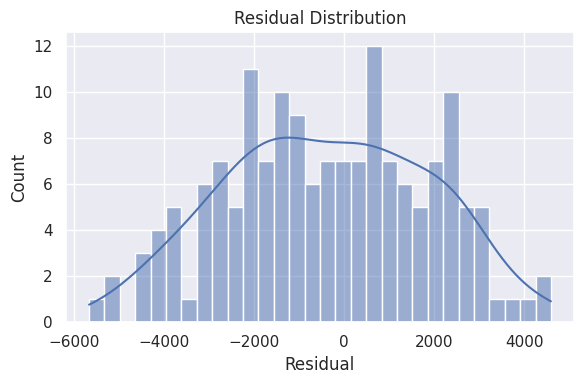

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(residual, bins=30, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()


## 8) Tahmin tablosu (ilk 15 kayıt)


In [ ]:
out = pd.DataFrame({
    "actual": y_test.values,
    "predicted": np.round(pred, 2),
    "residual": np.round(residual, 2)
})
out.head(15)


,actual,predicted,residual
0,9927.61,8535.16,1392.45
1,9144.92,8973.45,171.47
2,5533.03,9925.57,-4392.54
3,20229.52,23582.38,-3352.86
4,22267.56,24316.62,-2049.06
5,21153.37,21429.05,-275.68
6,9051.79,10767.41,-1715.62
7,10036.89,10069.08,-32.19
8,18871.75,22502.55,-3630.80
9,10659.33,9995.28,664.05
